1. Meta Data
 # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [21]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [22]:
# Define the column names as a list
column_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 
                'housing', 'loan', 'contact', 'day', 'month', 
                'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

2. Load Data


In [23]:

dataset = pd.read_csv("bank.csv", names = column_names, sep = ",", skipinitialspace=True)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,y
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,yes
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,yes
41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,yes
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,yes


In [24]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  11163
#Features =  17


In [25]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [26]:
# replace data with '?' by NaN
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  0


Filtering missing values 

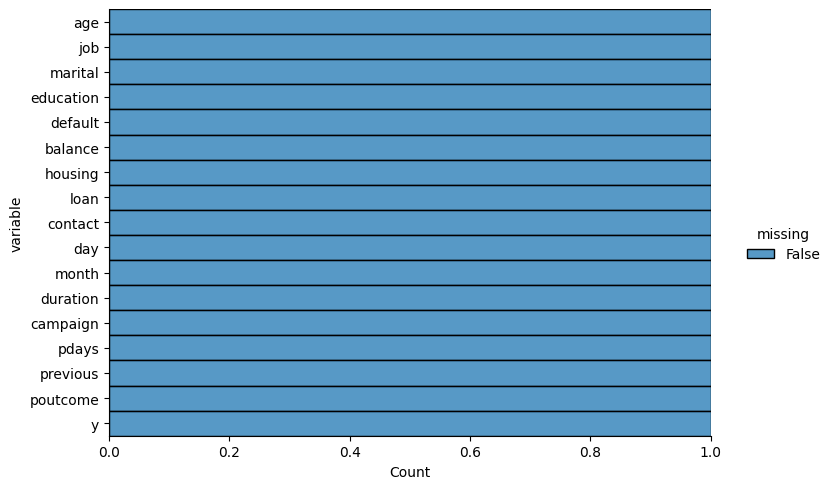

In [27]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [28]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  11163


3. Descriptive Statistical Analysis

Numerical variables

In [29]:
# list of numerical variables 
numerical_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

Histogram with frequencies

In [30]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

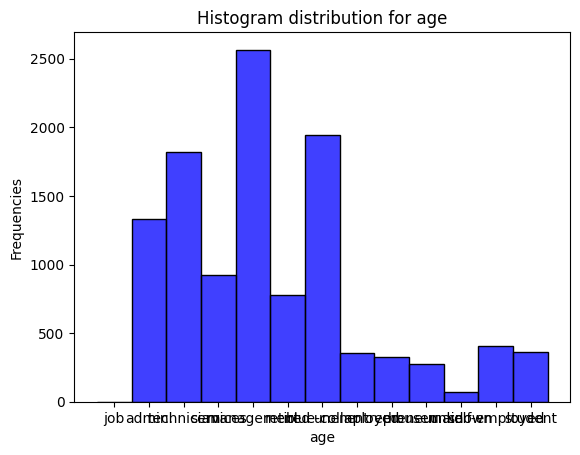

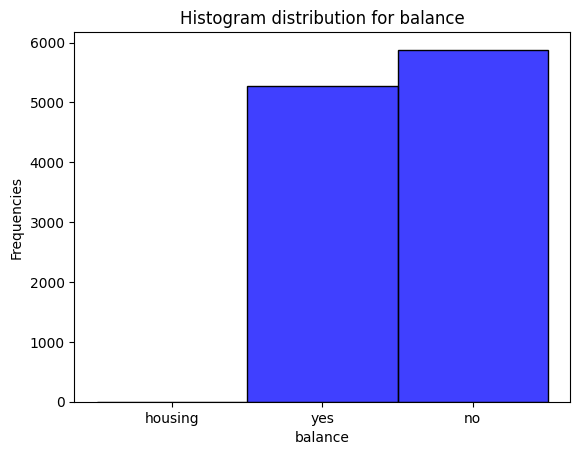

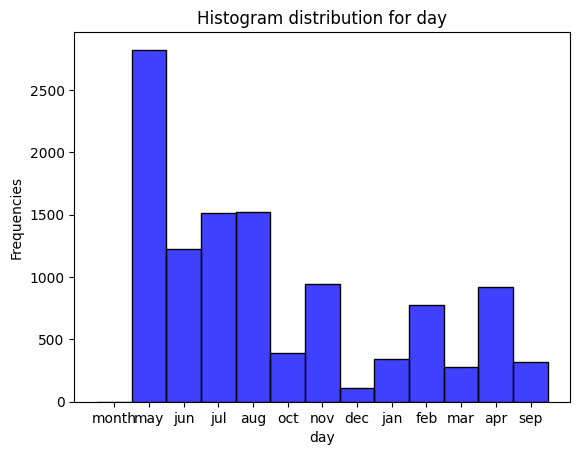

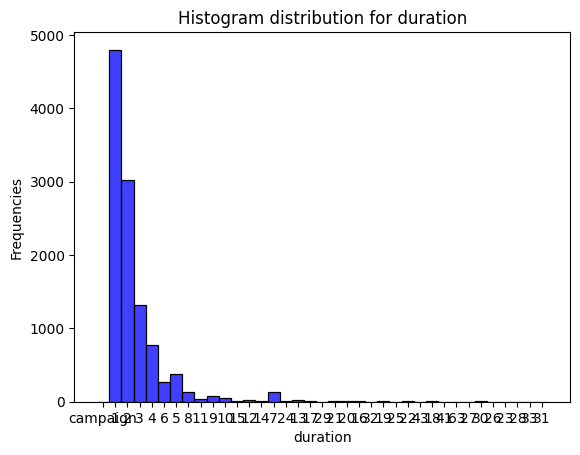

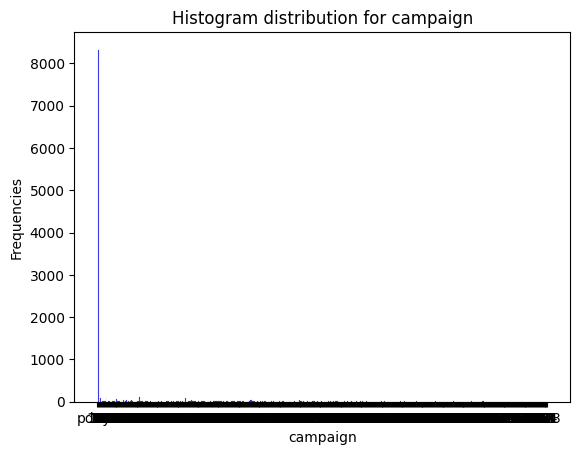

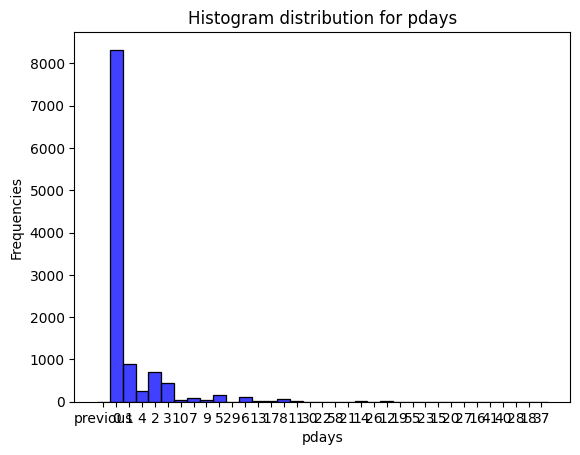

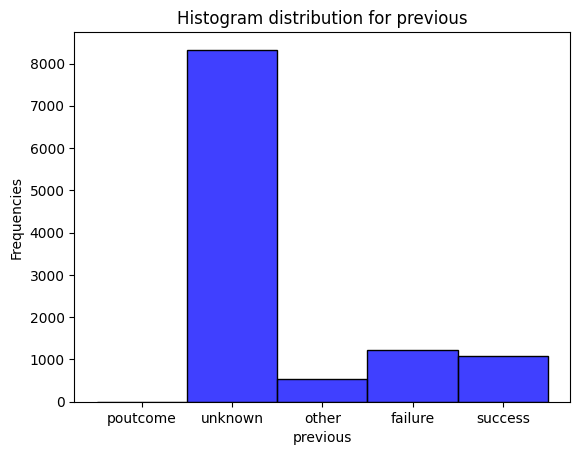

In [31]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

In [56]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

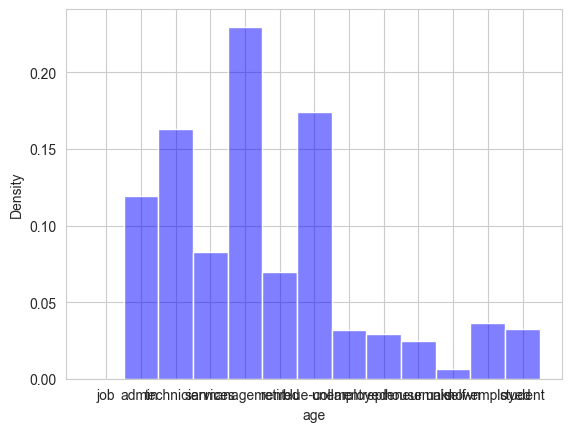

In [62]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

Box Plot


In [60]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

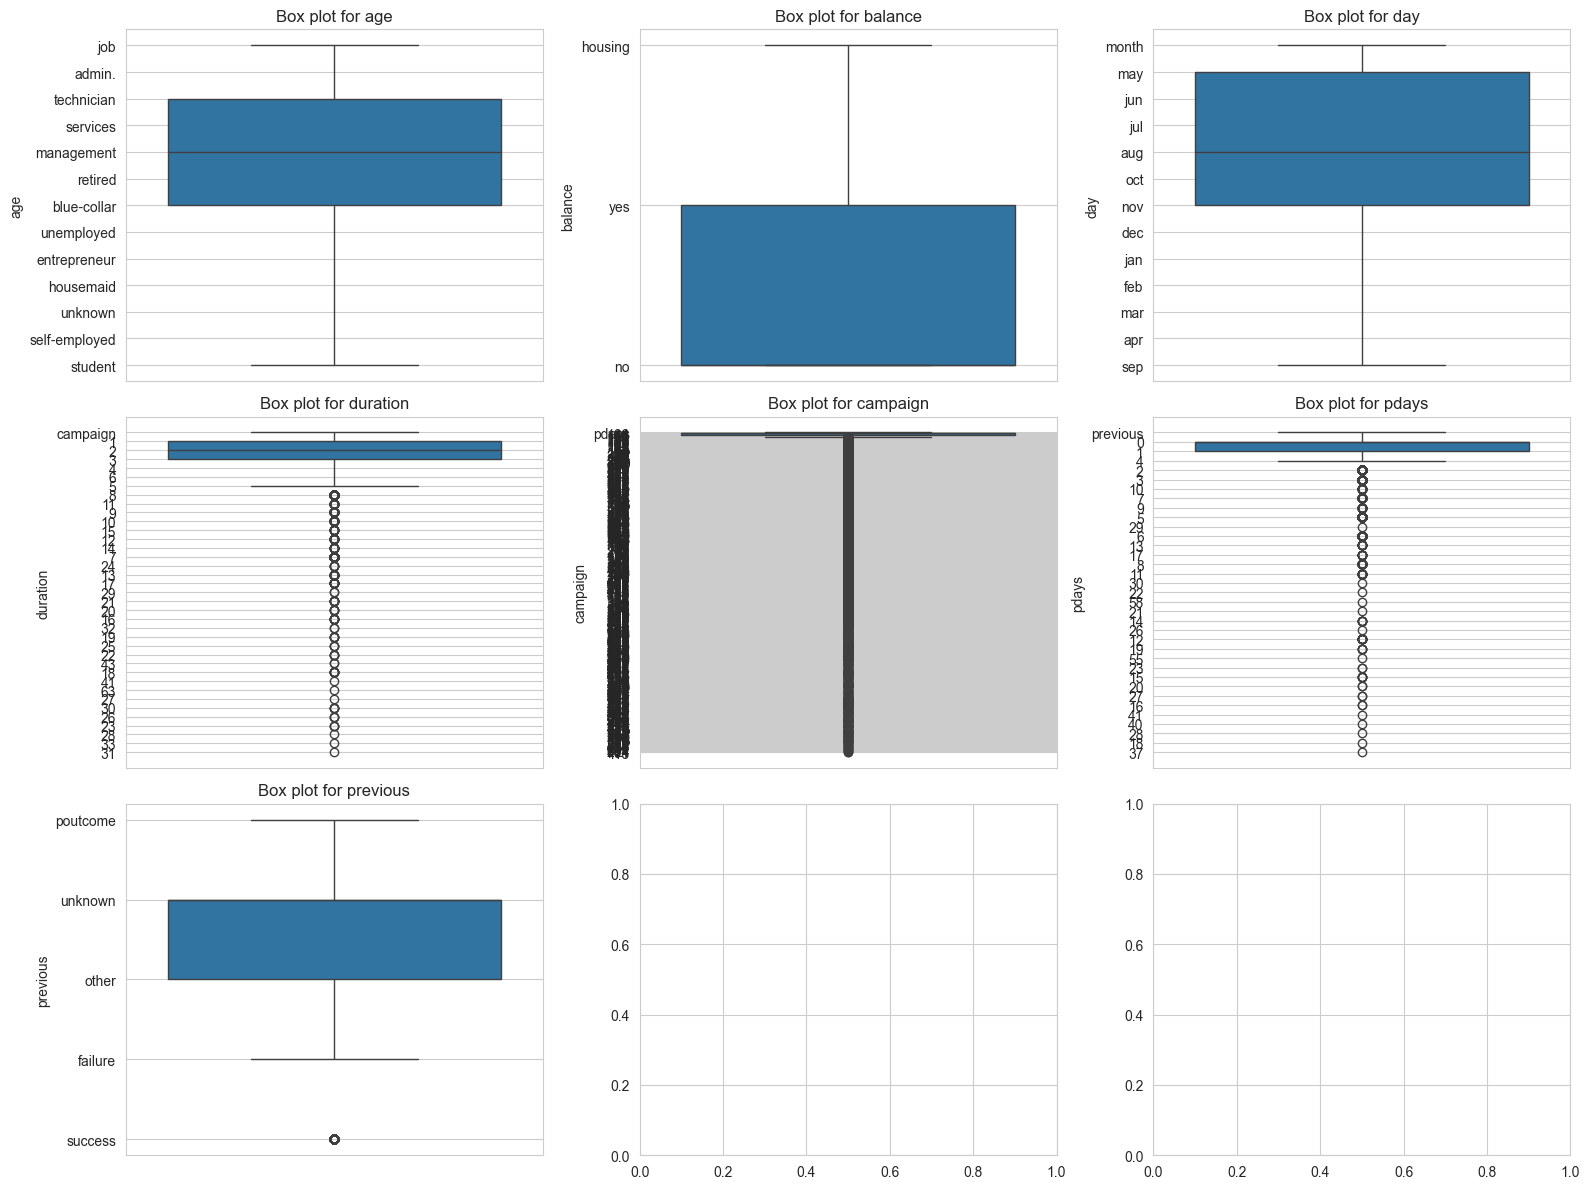

In [61]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

Statical metrical

In [34]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,11163,11163,11163,11163,11163,11163,11163
unique,13,3,13,37,473,35,5
top,management,no,may,1,-1,0,unknown
freq,2566,5881,2824,4798,8324,8324,8326


In [71]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

In [72]:
plot_correlation(dataset, numerical_cols)

ValueError: could not convert string to float: 'job'

In [37]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

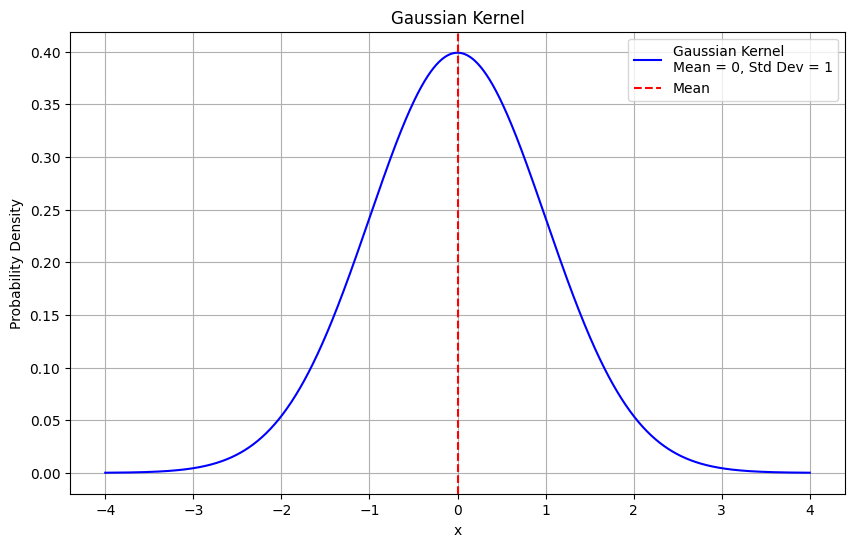

In [38]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [39]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

In [40]:
call_percentile(z = -2)

2.275

In [63]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [64]:
outliers_detection(dataset, "age").head()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [43]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in age ***


TypeError: unsupported operand type(s) for -: 'str' and 'str'

Categorical variables

In [44]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['y',
 'housing',
 'contact',
 'poutcome',
 'job',
 'marital',
 'month',
 'education',
 'default',
 'loan']

Count instances for each categorical column

In [45]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** y ******
y
no     5873
yes    5289
y         1
Name: count, dtype: int64

***** housing ******
housing
no      9702
yes     1460
loan       1
Name: count, dtype: int64

***** contact ******
contact
20     570
18     548
30     478
5      477
15     466
14     463
13     453
21     452
6      447
12     445
8      419
17     411
28     410
4      402
29     388
19     384
7      382
11     373
16     369
9      364
2      334
3      306
27     284
22     269
26     252
23     245
25     224
10     163
31     140
1      122
24     122
day      1
Name: count, dtype: int64

***** poutcome ******
poutcome
no         5873
yes        5289
deposit       1
Name: count, dtype: int64

***** job ******
job
married     6351
single      3518
divorced    1293
marital        1
Name: count, dtype: int64

***** marital ******
marital
secondary    5476
tertiary     3689
primary      1500
unknown       497
education       1
Name: count, dtype: int64

***** month ******
month
97      39
161     38
1

Bar chart - Analysis of absolute frequencies

In [46]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

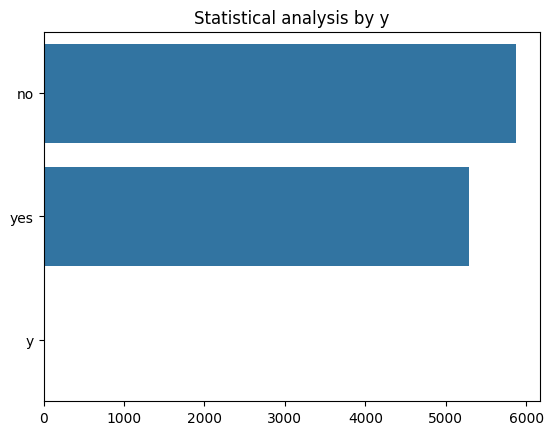

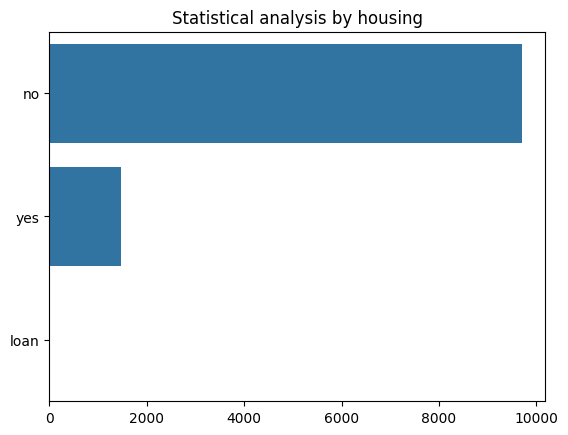

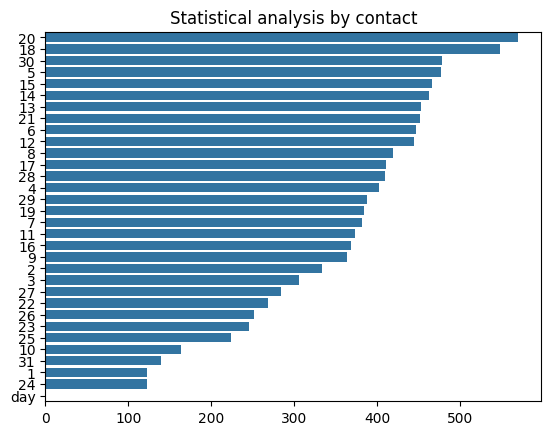

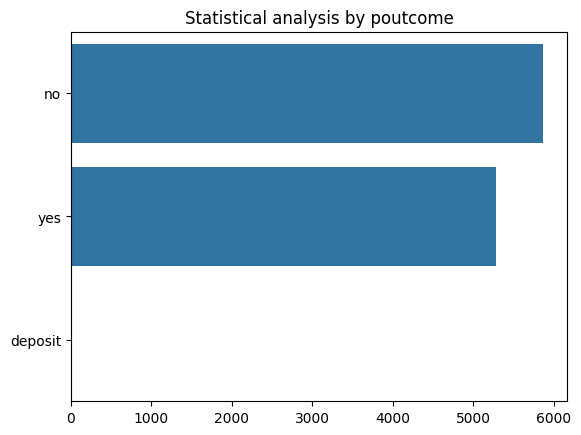

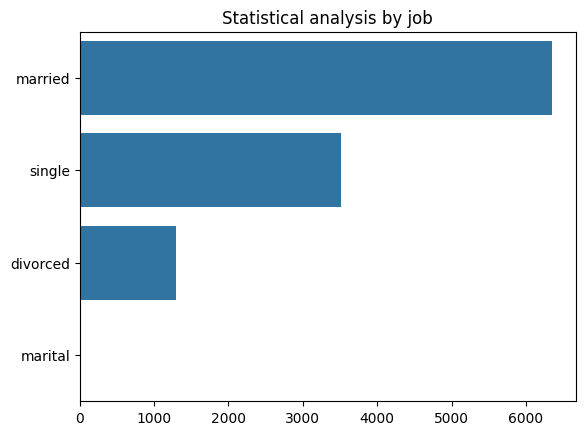

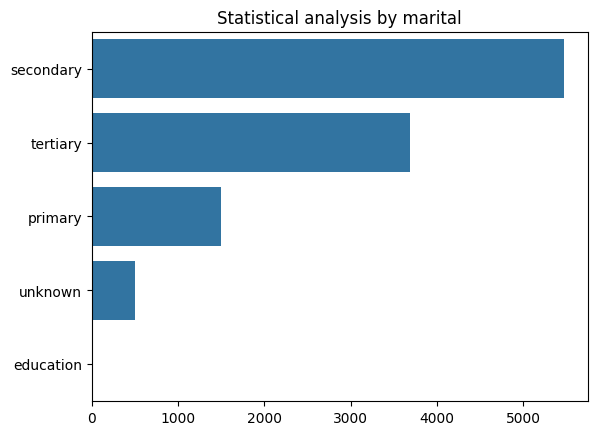

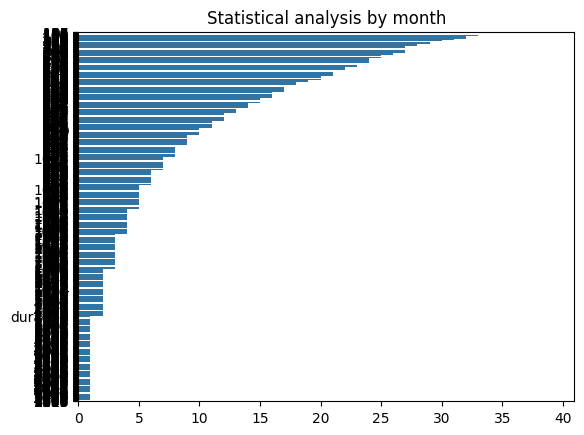

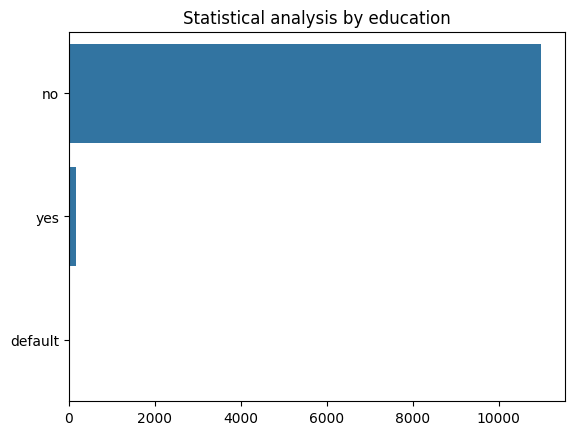

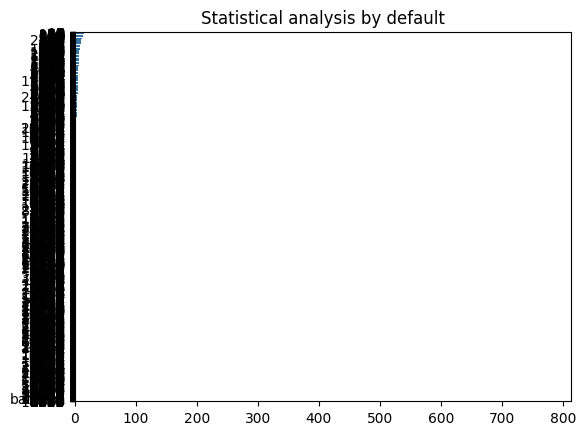

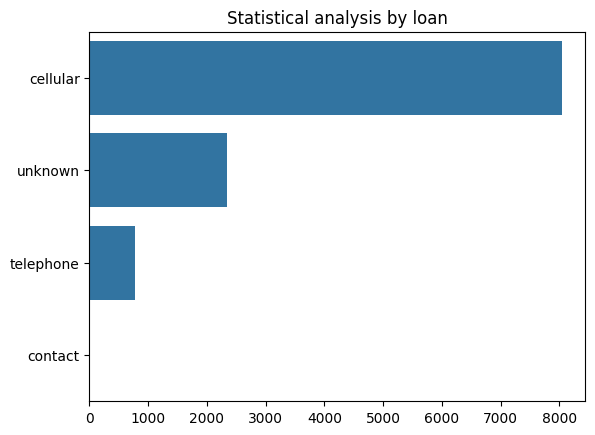

In [47]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

Pie Chart - Analysis of relative frequencies

In [48]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

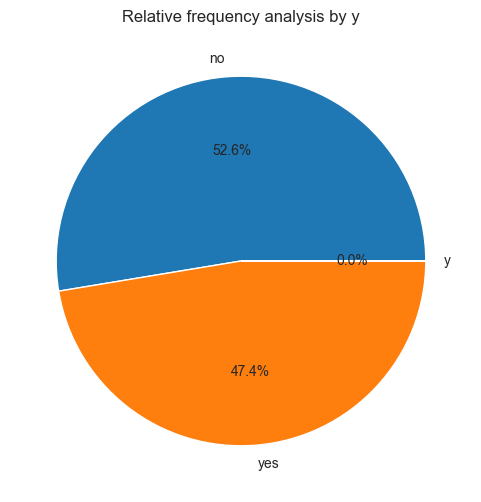

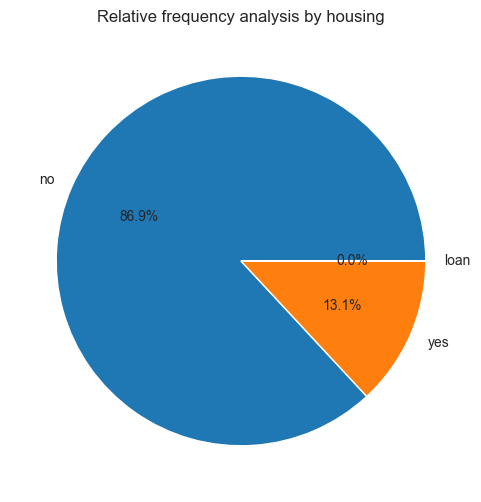

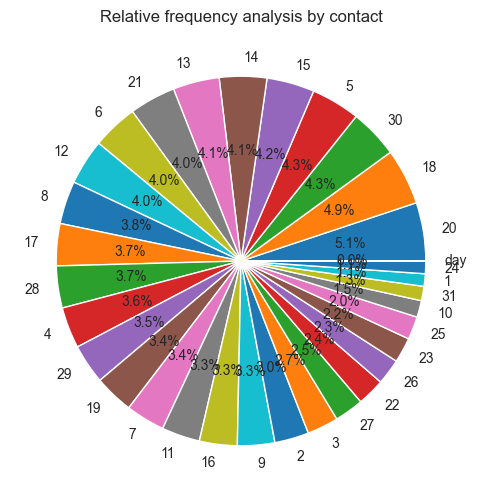

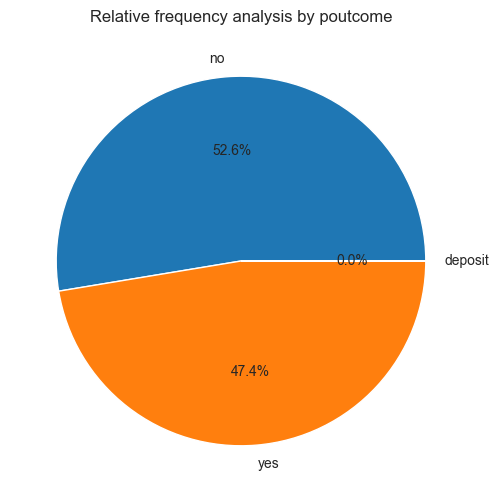

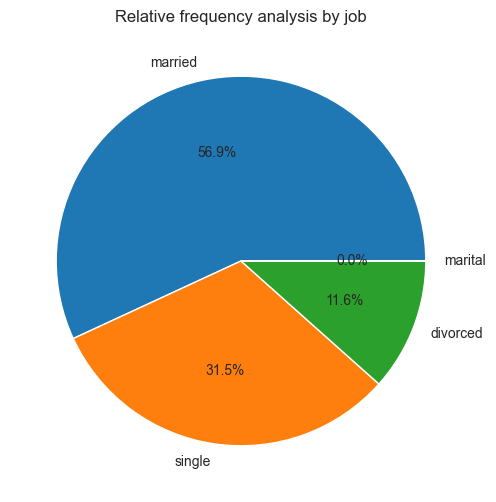

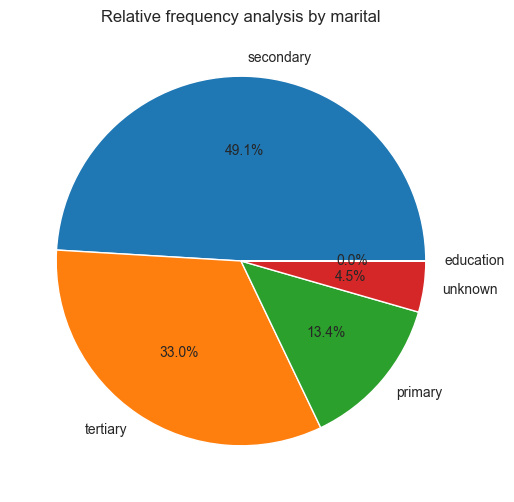

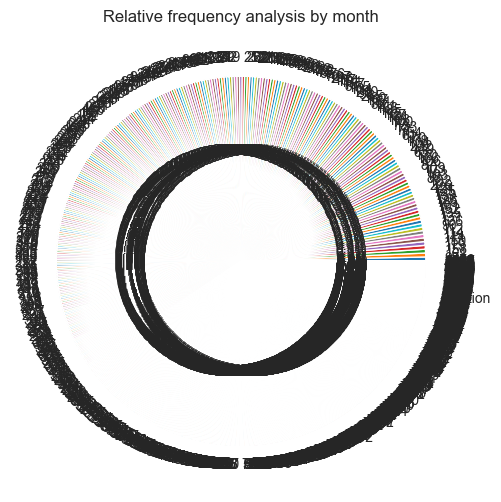

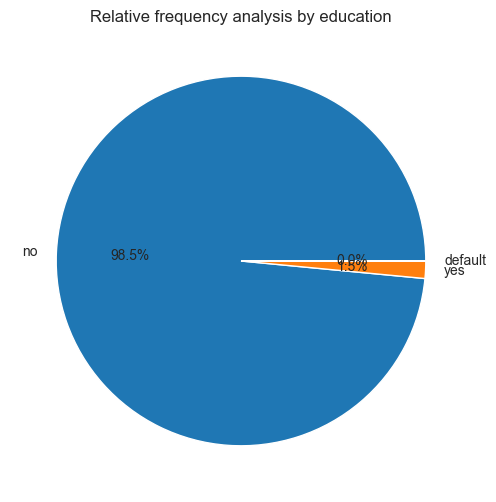

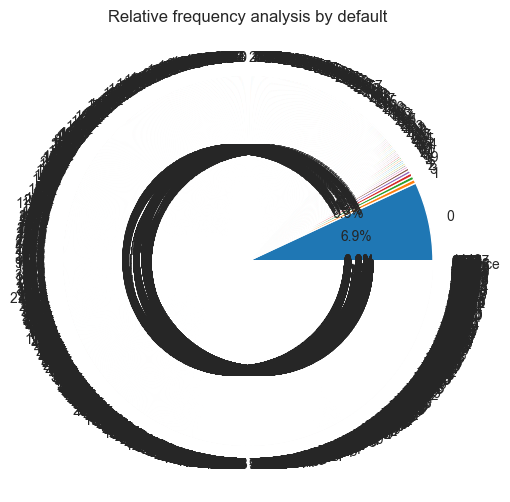

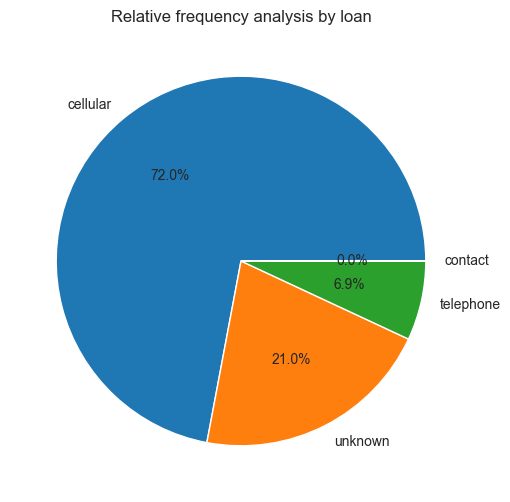

In [49]:

# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

Statistical Analysis for subgroups

In [50]:
# create groups organized by sex and income
group_job_y = dataset.groupby(["job", "y"]).size().reset_index(name = "samples")
print(group_job_y)

        job    y  samples
0  divorced   no      671
1  divorced  yes      622
2   marital    y        1
3   married   no     3596
4   married  yes     2755
5    single   no     1606
6    single  yes     1912


In [51]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Job')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Job and Y')
    plt.tight_layout()
    plt.show()

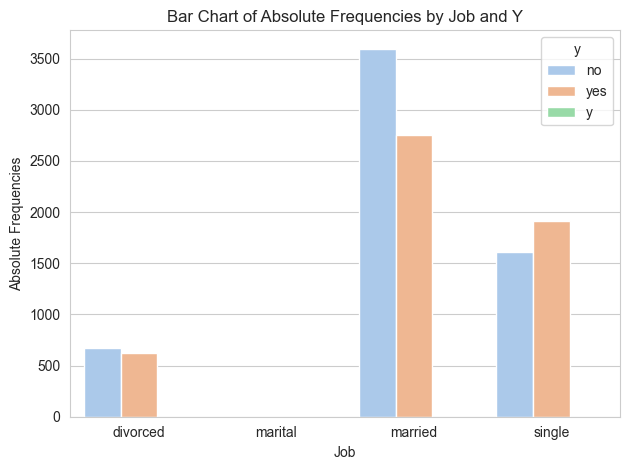

In [52]:
plot_absfreq_groups(group_job_y, "job", "y")

In [53]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with y " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Job and y')
    plt.show()

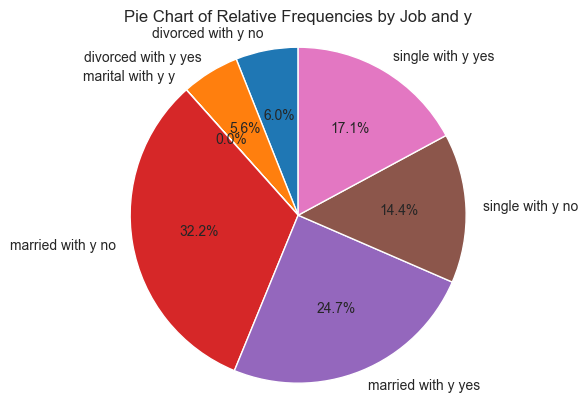

In [54]:

plot_relfreq_groups(group_job_y, "job", "y")

My last throught: From the objective of this assignment which was " 'y' has the client subscribed a term deposit?" and the answer being y yes/y no while those with y being neither. It has been observed that subscribers and non subscribers as spectators have had an equal share of the task as seen from the Pie chart(Half are subcribers and non subscribers another half).   